In [1]:
import scvelo as scv
scv.settings.verbosity = 0
dataset = '../data/DentateGyrus/10X43_1.h5ad'
label = 'clusters'
exp_metrics = {}

In [2]:
import unitvelo as utv

(Running UniTVelo 0.1.dev1+g1881f6e)
2022-03-26 14:10:29


In [3]:
cluster_edges = [("OPC", "OL")]

## scVelo stochastic

  0%|          | 0/2930 [00:00<?, ?cells/s]

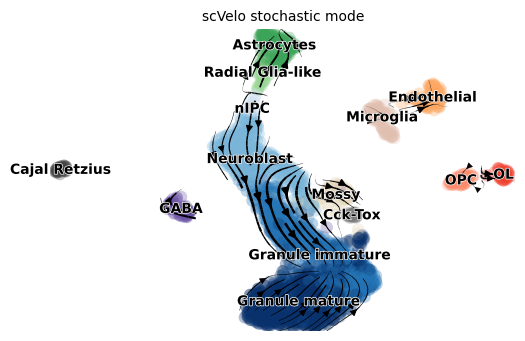

In [4]:
title = 'scVelo stochastic mode'
adata = scv.read(dataset)
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.velocity(adata, mode='stochastic')

scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=label, dpi=100, title=title)

In [5]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): -0.855338499473801}
Total Mean: -0.855338499473801
# In-cluster Coherence
{'Astrocytes': 0.90701276, 'Cajal Retzius': 0.988812, 'Cck-Tox': 0.94412506, 'Endothelial': 0.88232577, 'GABA': 0.884329, 'Granule immature': 0.8645942, 'Granule mature': 0.83385545, 'Microglia': 0.8697461, 'Mossy': 0.88386655, 'Neuroblast': 0.88449025, 'OL': 0.94917274, 'OPC': 0.9332657, 'Radial Glia-like': 0.9188469, 'nIPC': 0.83577245}
Total Mean: 0.8985868096351624


## scVelo dynamic

  0%|          | 0/975 [00:00<?, ?gene/s]

  0%|          | 0/2930 [00:00<?, ?cells/s]

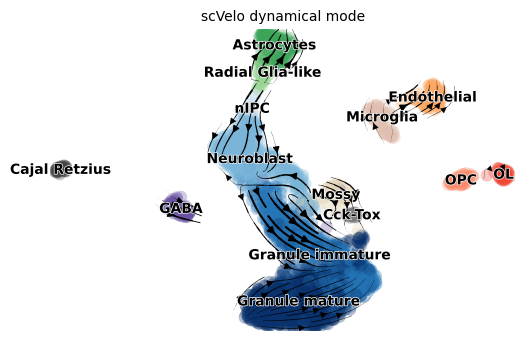

In [6]:
title = 'scVelo dynamical mode'
adata = scv.read(dataset)
adata.uns['datapath'] = dataset
scv.settings.verbosity = 0
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata, n_jobs=20)
scv.tl.velocity(adata, mode='dynamical')

scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=label, dpi=100, title=title)

In [7]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): 0.1582071348545778}
Total Mean: 0.1582071348545778
# In-cluster Coherence
{'Astrocytes': 0.771999885162555, 'Cajal Retzius': 0.9110103595666876, 'Cck-Tox': 0.957271281340312, 'Endothelial': 0.8801660845069899, 'GABA': 0.8814669243356612, 'Granule immature': 0.8174048929373919, 'Granule mature': 0.8115431593439624, 'Microglia': 0.8293117287111239, 'Mossy': 0.8062170533285385, 'Neuroblast': 0.7684984398576237, 'OL': 0.8247235751315007, 'OPC': 0.8889679044839749, 'Radial Glia-like': 0.9213970384219735, 'nIPC': 0.9546783724438013}
Total Mean: 0.8589040499694355


## UniTVelo

In [8]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
velo_config.IROOT = None
velo_config.FIT_OPTION = '2'
velo_config.ASSIGN_POS_U = False

-------> Model Configuration Settings <-------

 GPU: 2	FIG_DIR: ./figures/	BASE_FUNCTION: Gaussian	
 GENERAL: Curve	BASIS: None	N_TOP_GENES: 2000	
 OFFSET_GENES: False	FILTER_CELLS: False	EXAMINE_GENE: False	
 RESCALE_TIME: False	RESCALE_DATA: True	R2_ADJUST: True	
 IROOT: None	NUM_REPEAT: 1	FIT_OPTION: 2	
 DENSITY: Raw	REORDER_CELL: Hard	AGGREGATE_T: False	
 ASSIGN_POS_U: False	WIN_SIZE: 50	LEARNING_RATE: 0.01	
 MAX_ITER: 10000	USE_RAW: False	RAW_GENES: False	

---> # of velocity genes used 924
---> # of velocity genes used 869
---> # of velocity genes used 856


  0%|          | 0/10000 [00:00<?, ?it/s]

 | 98,95606983,153,271

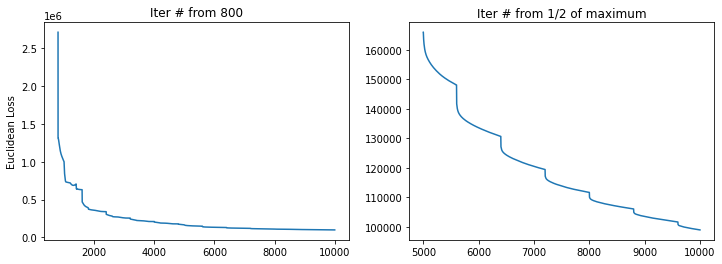

  0%|          | 0/2930 [00:00<?, ?cells/s]

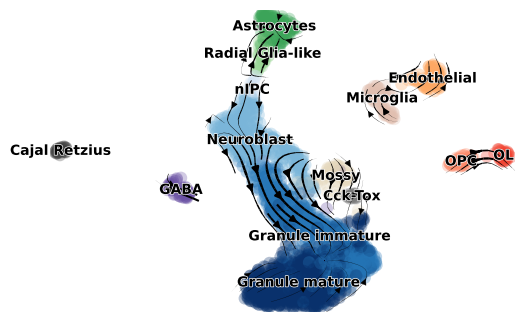

In [9]:
adata = utv.run_model(dataset, label, config_file=velo_config)
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

In [10]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): 0.7460465613858046}
Total Mean: 0.7460465613858046
# In-cluster Coherence
{'Astrocytes': 0.6031779574791151, 'Cajal Retzius': 0.9181269306615849, 'Cck-Tox': 0.9306887558175438, 'Endothelial': 0.8327793887246298, 'GABA': 0.8471304727442175, 'Granule immature': 0.7221904471806126, 'Granule mature': 0.6277323760851665, 'Microglia': 0.7612762607329633, 'Mossy': 0.7457916112036993, 'Neuroblast': 0.6163048530165389, 'OL': 0.8098349233390861, 'OPC': 0.8581262654459608, 'Radial Glia-like': 0.6528439585837803, 'nIPC': 0.7782369958622342}
Total Mean: 0.764588656919795


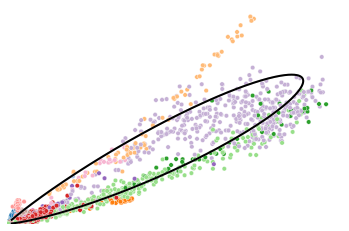

In [14]:
utv.pl.plot_range('Tmsb10', adata, velo_config, 
    show_legend=False, show_ax=False,
    t_left=0, t_right=1, time_metric='latent_time')